In [ ]:
# IF NOT LAUNCHING WITH GOOGLE COLAB, SET THIS TO FALSE
using_colab = True

In [ ]:
# setup for colab
if using_colab:
    # connect google drive to colab
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    
    # download packages to google colab
    !pip install matplotlib
    !pip install numpy
    !pip install pandas
    !pip install sklearn


# to clean output of cell
from IPython.display import clear_output
clear_output()

In [ ]:
# import packages
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import warnings

In [ ]:
def load_data(data_path):
    data = np.load(data_path, allow_pickle=True)

    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']

    return X_train, X_test, y_train, y_test

In [ ]:
def get_sample_data(data, nb_samples):
    X_train, X_test, y_train, y_test = data

    # for multi-dimensional arrays
    X_train = X_train[:nb_samples,:]
    X_test = X_test[:nb_samples,:]

    # for 1 dimensional arrays
    y_train = y_train[:nb_samples]
    y_test = y_test[:nb_samples]

    return X_train, X_test, y_train, y_test

In [ ]:
def FP_FN_cost(model_save_name, dataset_name, root_dir, test_mode=False):
    '''
    The goal of this function is to return an optimized decision threshold, 
    given a model and a loss function.

    We give a cost to false positives (FP) and false negatives (FN)
    to create the loss function (the sum of FP and FN).

    Then we get prediction probabilities of the model on the test set 
    and find the decision threshold that yields the lowest cost.
    '''

    # cost of each error type
    FP_cost = 1
    FN_cost = 10
    
    # get model
    with open(root_dir + '/models/' + model_save_name + '.pkl', 'rb') as f:
        classifier = pickle.load(f)
    

    # get data
    data_path = root_dir + '/data/' + dataset_name + '_train_test_sets' + '.npz'
    data = load_data(data_path)

    test_mode_samples = 10000
    if test_mode:
        # limit data points for faster execution time
        data = get_sample_data(data, test_mode_samples)
    else:
        # Suppress warnings for clean execution
        warnings.filterwarnings('ignore')
    
    X_train, X_test, y_train, y_test = data


    # get predictions of trained model on test set
    y_proba = np.delete(classifier.predict_proba(X_test), 0, axis=1)


    # threshold search
    nb_threshold_samples = 100

    from sklearn.metrics import confusion_matrix
    thresholds = np.linspace(0, 1, nb_threshold_samples)

    FPs, FPs_scores, FNs, FNs_scores, scores, = [], [], [], [], []
    
    for threshold in thresholds:
        y_proba_thresholded = np.where(y_proba >= threshold, 1, 0)
        TN, FP, FN, TP = confusion_matrix(y_test, y_proba_thresholded).ravel()
        FP_score = FP * FP_cost
        FN_score = FN * FN_cost
        score = FP * FP_cost + FN * FN_cost

        FPs.append(FP)
        FPs_scores.append(FP_score)
        FNs.append(FN)
        FNs_scores.append(FN_score)
        scores.append(score)


    # plot result of threshold search
    plt.figure()
    plt.plot(thresholds, FPs, color='green', label='false positives')
    plt.plot(thresholds, FNs, color='orange', label='false negatives')
    plt.title('Threshold optimization')
    plt.xlabel('thresholds')
    plt.legend()
    plt.show()
    print()

    plt.figure()
    plt.plot(thresholds, scores, linewidth=2, color='blue', label='total cost')
    plt.plot(thresholds, FPs_scores, linestyle='dashed', color='green', label='false positives cost')
    plt.plot(thresholds, FNs_scores, linestyle='dashed', color='orange', label='false negatives cost')
    plt.title('Threshold optimization')
    plt.xlabel('thresholds')
    plt.legend()
    plt.show()
    print()


    # select best threshold
    best_score = min(scores)
    best_threshold = thresholds[scores.index(best_score)]
    print('Best threshold:', best_threshold)
    print('Best score:', best_score)

    return best_threshold

In [ ]:
# define root directory for the script
if using_colab:
    root_dir = '/content/gdrive/MyDrive/oc_projet_4'
else:
    root_dir = 'D:/OpenClassrooms/projet_4'

# define dataset to use
#dataset_name = 'app'
dataset_name = 'app_domain'
#dataset_name = 'app_poly'

## The model with the best performance is the logistic regression, <br>so this is the one we optimize

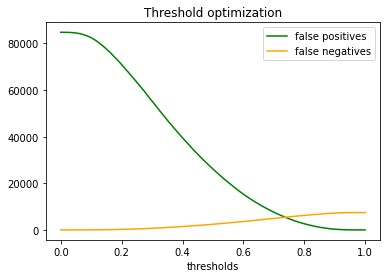

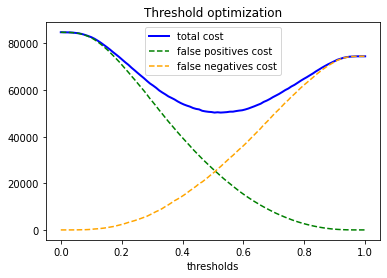


Best threshold: 0.5050505050505051
Best score: 50342


In [ ]:
model_save_name = 'LogisticRegression-25-10-13'

res = FP_FN_cost(model_save_name, dataset_name, root_dir)

## Out of curiosity, let's see what another model's loss would look like

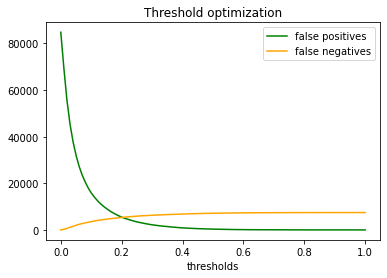

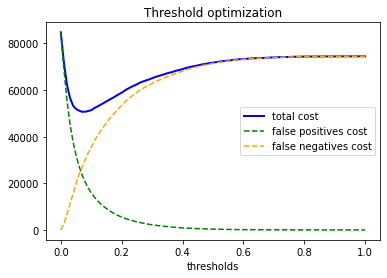


Best threshold: 0.07070707070707072
Best score: 50667


In [ ]:
model_save_name = 'XGBClassifier-10-15-49'

res = FP_FN_cost(model_save_name, dataset_name, root_dir)